In [65]:
import geopandas as gpd
import pandas as pd
import mapclassify
import pysal
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.explore import inequality
from pysal.lib import weights
from shapely.geometry import LineString, MultiLineString, Point
import numpy as np
from geosnap.analyze import isochrones_from_id, isochrones_from_gdf, pdna_to_adj 
from geosnap.io import get_acs, get_lodes
from geosnap import DataStore
import os
from random import sample
import tobler
import pandana as pdna
import quilt3 as q3
from tobler.area_weighted import area_interpolate

In [66]:
datasets = DataStore('/srv/data/geosnap')

In [67]:
sd_tracts = get_acs(datasets, county_fips='06073', years=[2021])

/opt/tljh/user/lib/python3.10/site-packages/geosnap/_data.py:16: UserWarning: Streaming data from S3. Use `geosnap.io.store_acs()` to store the data locally for better performance
  warn(warning_msg)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/util.py:275: UserWarning: Unable to find local adjustment year for 2021. Attempting from online data
  warn(
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/constructors.py:215: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


In [68]:
os.getcwd()

'/home/jupyter-gbartel2616/notes/git/project/Employment-Centers-'

In [69]:
lodes = gpd.read_parquet("lodes.parquet")

In [70]:
lodes

geoid  year  CFA01  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
214    060730004002000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
229    060730004004000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1604   060730028011010  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3062   060730038001018  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3859   060730053021009  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4265   060730062001000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5937   060730083051007  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5948   060730083051018  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6079   060730083121001  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6410   060730083391005  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6423   060730083391018  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6439   060730083391034  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6519   060730083462000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6543   060730083462024  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6676   060730083501024  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6705   060730083502006  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7096   060730083692001  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7218   060730083762000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7222   060730083763000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7690   060730085111005  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7700   060730085111015  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7768   060730085113001  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7771   060730085113004  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7775   060730085113008  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7886   060730087021003  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8522   060730093074013  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14242  060730150022003  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16871  060730170492019  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17007  060730170561002  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17563  060730170711003  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28563  060730221012009  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       CFS03  ...  naics_55  naics_56  naics_61  naics_62  naics_71  naics_72  \
214      0.0  ...       2.0      68.0       0.0    9820.0       0.0       0.0   
229      0.0  ...       0.0       3.0       4.0    4177.0       0.0       0.0   
1604     0.0  ...       0.0      23.0    3343.0       0.0       0.0      35.0   
3062     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3859     0.0  ...      44.0       0.0      42.0       2.0      26.0      82.0   
4265     0.0  ...       0.0      21.0       0.0       0.0       0.0     162.0   
5937     0.0  ...       0.0      25.0   20987.0       0.0       0.0      49.0   
5948     0.0  ...       0.0      80.0       0.0    4071.0       0.0       0.0   
6079     0.0  ...       0.0      28.0      46.0    3026.0       0.0     260.0   
6410     0.0  ...       0.0       0.0     664.0       2.0       1.0      15.0   
6423     0.0  ...       0.0       6.0       1.0     161.0       0.0      33.0   
6439     0.0  ...    2678.0     190.0     177.0    1019.0       0.0       3.0   
6519     0.0  ...      15.0       0.0      37.0      19.0       0.0      55.0   
6543     0.0  ...    1494.0      63.0       0.0      81.0       0.0       9.0   
6676     0.0  ...     205.0    5802.0      10.0      74.0       1.0      75.0   
6705     0.0  ...      72.0    2192.0     258.0     534.0       3.0      70.0   
7096     0.0  ...       0.0    5101.0       0.0

In [71]:
lodes.head()

geoid  year  CFA01  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
214   060730004002000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
229   060730004004000  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1604  060730028011010  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3062  060730038001018  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3859  060730053021009  2021    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      CFS03  ...  naics_55  naics_56  naics_61  naics_62  naics_71  naics_72  \
214     0.0  ...       2.0      68.0       0.0    9820.0       0.0       0.0   
229     0.0  ...       0.0       3.0       4.0    4177.0       0.0       0.0   
1604    0.0  ...       0.0      23.0    3343.0       0.0       0.0      35.0   
3062    0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3859    0.0  ...      44.0       0.0      42.0       2.0      26.0      82.0   

      naics_81  naics_92  population  total_employees  
214       18.0       0.0         121           9995.0  
229        0.0       0.0        1019           4272.0  
1604     568.0       0.0          27           4007.0  
3062       0.0       0.0         984           4148.0  
3859       2.0   11185.0          48          12455.0  

[5 rows x 59 columns]

In [72]:
sd_tracts.columns

Index(['geoid', 'n_total_housing_units', 'n_vacant_housing_units',
       'n_occupied_housing_units', 'n_owner_occupied_housing_units',
       'n_renter_occupied_housing_units',
       'n_housing_units_multiunit_structures_denom',
       'n_housing_units_multiunit_structures', 'n_total_housing_units_sample',
       'median_home_value', 'median_contract_rent',
       'n_occupied_housing_units_sample', 'n_persons_under_18',
       'n_persons_over_60', 'n_persons_over_75', 'n_persons_over_15',
       'n_persons_over_25', 'n_married', 'n_widowed_divorced',
       'n_total_families', 'n_female_headed_families',
       'n_nonhisp_white_persons', 'n_nonhisp_black_persons',
       'n_hispanic_persons', 'n_native_persons', 'n_hawaiian_persons',
       'n_asian_indian_persons', 'n_asian_persons', 'n_civilians_over_16',
       'n_veterans', 'median_household_income', 'n_total_households',
       'per_capita_income', 'n_poverty_families_children',
       'n_edu_college_greater', 'n_edu_hs_less', '

In [73]:
# get age and education from lodes and compare to the education level for people in the acs (people living in the area)

In [74]:
demographics= sd_tracts[['p_hispanic_persons','p_native_persons','p_asian_persons','p_hawaiian_persons','p_asian_indian_persons','p_edu_hs_less','p_edu_college_greater','geoid','geometry']]

In [75]:
demographics

p_hispanic_persons  p_native_persons  p_asian_persons  \
0              21.483555               0.0         2.029391   
1               7.858546               0.0         5.762934   
2               1.070039               0.0         8.657588   
3               8.743169               0.0         3.122560   
4              14.860140               0.0         0.000000   
...                  ...               ...              ...   
2053           16.328709               0.0        11.526147   
2054            5.982275               0.0        11.595273   
2055           17.501088               0.0         5.267741   
2056           75.200642               0.0         5.939005   
2057                 NaN               NaN              NaN   

      p_hawaiian_persons  p_asian_indian_persons  p_edu_hs_less  \
0               0.839748                2.029391       3.050524   
1               0.000000                5.762934       2.645051   
2               0.000000                8.657588       2.948718   
3               0.000000                3.122560       0.000000   
4               0.000000                0.000000       9.262760   
...                  ...                     ...            ...   
2053            0.000000               11.526147       2.820685   
2054            0.000000               11.595273       2.485660   
2055            0.000000                5.267741       7.040998   
2056            0.000000                5.939005      51.790831   
2057                 NaN                     NaN            NaN   

      p_edu_college_greater         geoid  \
0                 82.745472  060730001001   
1                 77.303754  060730001002   
2                 81.282051  060730002011   
3                 71.321462  060730002012   
4                 51.417769  060730002021   
...                     ...           ...   
2053              67.427804  060730221021   
2054              85.659656  060730221022   
2055              67.201426  060730221023   
2056              19.412607  060730221024   
2057                    NaN  060739901000   

                                               geometry  
0     MULTIPOLYGON (((-117.18984 32.75861, -117.1896...  
1     MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
2     MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
3     MULTIPOLYGON (((-117.17415 32.75561, -117.1739...  
4     MULTIPOLYGON (((-117.18241 32.74255, -117.1819...  
...                                                 ...  
2053  MULTIPOLYGON (((-117.29552 33.10990, -117.2947...  
2054  MULTIPOLYGON (((-117.28155 33.11199, -117.2815...  
2055  MULTIPOLYGON (((-117.30199 33.12209, -117.3019...  
2056  MULTIPOLYGON (((-117.29064 33.11983, -117.2906...  
2057  MULTIPOLYGON (((-117.61104 33.33412, -117.6086...  

[2058 rows x 9 columns]

In [76]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

In [77]:
lodes_demos= lodes[['education_bachelors','education_hs','education_lths','education_some_college','employees_30_54','employees_55plus','employees_under_30','geoid']]

In [78]:
lodes_demos

education_bachelors  education_hs  education_lths  \
214                 3266.0        1347.0           990.0   
229                 1174.0         717.0           542.0   
1604                1620.0         563.0           321.0   
3062                 542.0         840.0           891.0   
3859                3459.0        2196.0          1479.0   
4265                1152.0         975.0           638.0   
5937                7181.0        2678.0          1747.0   
5948                2425.0         270.0            92.0   
6079                2347.0         812.0           646.0   
6410                1957.0         662.0           371.0   
6423                2014.0         627.0           361.0   
6439                5547.0        1883.0          1231.0   
6519                3247.0        1067.0           771.0   
6543                2456.0         528.0           399.0   
6676                1758.0        1146.0           780.0   
6705                2230.0        1377.0          1059.0   
7096                1886.0        1026.0           676.0   
7218                 527.0         530.0           446.0   
7222                1798.0         579.0           343.0   
7690                7071.0        4113.0          2610.0   
7700                1179.0         688.0           548.0   
7768                1177.0         852.0           732.0   
7771                2558.0        1638.0          1179.0   
7775                1633.0         890.0           644.0   
7886                2190.0        1128.0           714.0   
8522                1094.0         781.0           648.0   
14242               1195.0         689.0           485.0   
16871               1337.0         852.0           600.0   
17007               2555.0         989.0           612.0   
17563               1867.0         668.0           465.0   
28563               1756.0         994.0           752.0   

       education_some_college  employees_30_54  employees_55plus  \
214                    2136.0           6017.0            1722.0   
229                    1187.0           2650.0             970.0   
1604                    871.0           2272.0            1103.0   
3062                   1031.0           2316.0             988.0   
3859                   3853.0           8092.0            2895.0   
4265                   1295.0           2719.0            1341.0   
5937                   4321.0          12173.0            3754.0   
5948                   1152.0           2794.0            1145.0   
6079                   1426.0           3788.0            1443.0   
6410                   1095.0           3106.0             979.0   
6423                   1048.0           2897.0            1153.0   
6439                   3226.0           9104.0            2783.0   
6519                   1768.0           5377.0            1476.0   
6543                    926.0           3537.0             772.0   
6676                   1690.0           4410.0             964.0   
6705                   1960.0           5030.0            1596.0   
7096                   1670.0           4159.0            1099.0   
7218                    714.0           1685.0             532.0   
7222                    907.0           3095.0             532.0   
7690                   7266.0          15950.0            5110.0   
7700                   1100.0           2540.0             975.0   
7768                   1128.0           2854.0            1035.0   
7771                   2447.0           5386.0            2436.0   
7775                   1493.0           3389.0            1271.0   
7886                   1992.0           4288.0            1736.0   
8522                   1198.0           2477.0            1244.0   
14242                  1254.0           2653.0             970.0   
16871                  1370.0           3317.0             842.0   
17007                  1714.0           4066.0            1804.0   
17563                  1214.0           2866.0

In [79]:
lodes_ages=lodes[['geoid','employees_30_54','employees_55plus','employees_under_30']]

In [80]:
lodes_ages

geoid  employees_30_54  employees_55plus  employees_under_30
214    060730004002000           6017.0            1722.0              2256.0
229    060730004004000           2650.0             970.0               652.0
1604   060730028011010           2272.0            1103.0               632.0
3062   060730038001018           2316.0             988.0               844.0
3859   060730053021009           8092.0            2895.0              1468.0
4265   060730062001000           2719.0            1341.0               940.0
5937   060730083051007          12173.0            3754.0              5185.0
5948   060730083051018           2794.0            1145.0               324.0
6079   060730083121001           3788.0            1443.0               902.0
6410   060730083391005           3106.0             979.0               486.0
6423   060730083391018           2897.0            1153.0               525.0
6439   060730083391034           9104.0            2783.0              2154.0
6519   060730083462000           5377.0            1476.0              1590.0
6543   060730083462024           3537.0             772.0               718.0
6676   060730083501024           4410.0             964.0              2343.0
6705   060730083502006           5030.0            1596.0              2170.0
7096   060730083692001           4159.0            1099.0              1383.0
7218   060730083762000           1685.0             532.0              2676.0
7222   060730083763000           3095.0             532.0               614.0
7690   060730085111005          15950.0            5110.0              2867.0
7700   060730085111015           2540.0             975.0               552.0
7768   060730085113001           2854.0            1035.0               947.0
7771   060730085113004           5386.0            2436.0              1350.0
7775   060730085113008           3389.0            1271.0               623.0
7886   060730087021003           4288.0            1736.0               928.0
8522   060730093074013           2477.0            1244.0              1150.0
14242  060730150022003           2653.0             970.0               569.0
16871  060730170492019           3317.0             842.0              1091.0
17007  060730170561002           4066.0            1804.0              1002.0
17563  060730170711003           2866.0            1348.0               920.0
28563  060730221012009           3553.0            1329.0              1096.0

In [81]:
acs_variables = ['p_hispanic_persons','p_native_persons','p_asian_persons','p_hawaiian_persons','p_asian_indian_persons','n_nonhisp_white_persons', 'n_nonhisp_black_persons']
num_classes = 10

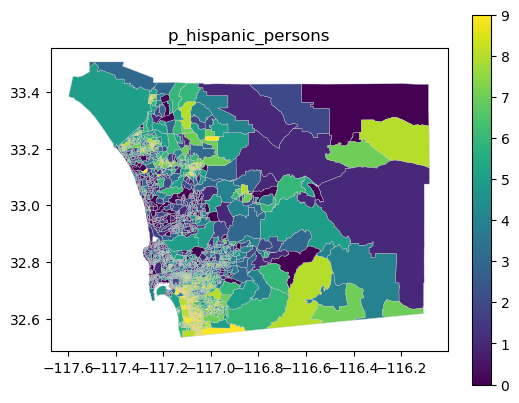

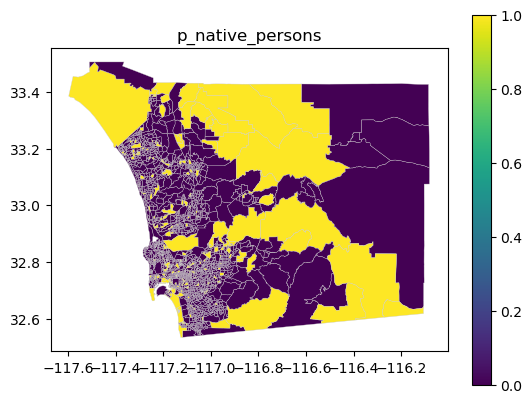

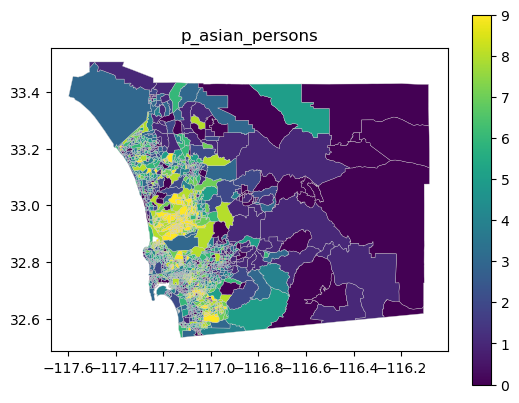

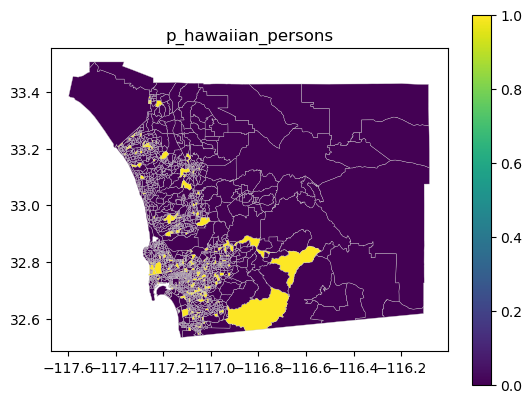

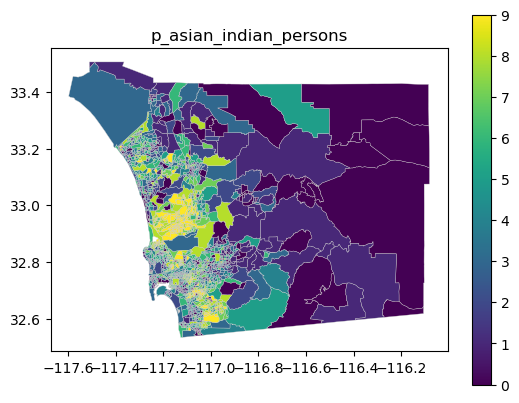

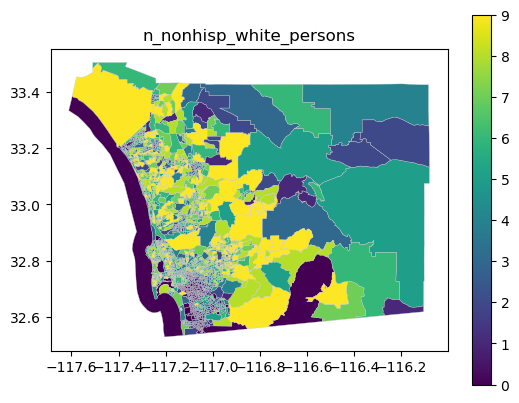

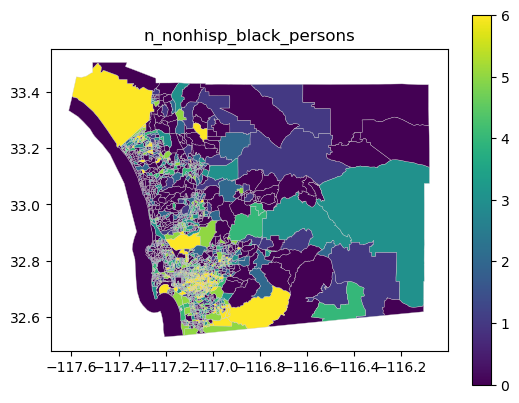

In [82]:
for var in acs_variables:
   
  sd_tracts[f'{var}_deciles'] = pd.qcut(sd_tracts[var], num_classes, labels=False, duplicates='drop')
    
 
  fig, ax = plt.subplots(1,1)
  sd_tracts.plot(column=f'{var}_deciles', cmap='viridis', linewidth=0.25, ax=ax, edgecolor='0.8', legend=True)
  ax.set_title(f'{var}')
  plt.show()

In [83]:
lodes_variables = ['education_bachelors','education_hs','education_lths','education_some_college','employees_30_54','employees_55plus','employees_under_30','geoid']
num_classes = 10

In [84]:
demographics = demographics.dropna()

In [85]:
lgeoid = lodes_demos.geoid
dgeoid = demographics.geoid

In [86]:
lgeoid.head()

214     060730004002000
229     060730004004000
1604    060730028011010
3062    060730038001018
3859    060730053021009
Name: geoid, dtype: object

In [87]:
dgeoid.head()

0    060730001001
1    060730001002
2    060730002011
3    060730002012
4    060730002021
Name: geoid, dtype: object

In [88]:
len(dgeoid[0])

12

In [89]:
len(lgeoid.values[0])

15

In [90]:
short_geoid = [code[:12] for code in lgeoid.values]

In [91]:
short_geoid

['060730004002',
 '060730004004',
 '060730028011',
 '060730038001',
 '060730053021',
 '060730062001',
 '060730083051',
 '060730083051',
 '060730083121',
 '060730083391',
 '060730083391',
 '060730083391',
 '060730083462',
 '060730083462',
 '060730083501',
 '060730083502',
 '060730083692',
 '060730083762',
 '060730083763',
 '060730085111',
 '060730085111',
 '060730085113',
 '060730085113',
 '060730085113',
 '060730087021',
 '060730093074',
 '060730150022',
 '060730170492',
 '060730170561',
 '060730170711',
 '060730221012']

In [92]:
lodes_demos['shortgeoid']=short_geoid

/tmp/ipykernel_1998999/2478044967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodes_demos['shortgeoid']=short_geoid


In [93]:
lodes_demos

education_bachelors  education_hs  education_lths  \
214                 3266.0        1347.0           990.0   
229                 1174.0         717.0           542.0   
1604                1620.0         563.0           321.0   
3062                 542.0         840.0           891.0   
3859                3459.0        2196.0          1479.0   
4265                1152.0         975.0           638.0   
5937                7181.0        2678.0          1747.0   
5948                2425.0         270.0            92.0   
6079                2347.0         812.0           646.0   
6410                1957.0         662.0           371.0   
6423                2014.0         627.0           361.0   
6439                5547.0        1883.0          1231.0   
6519                3247.0        1067.0           771.0   
6543                2456.0         528.0           399.0   
6676                1758.0        1146.0           780.0   
6705                2230.0        1377.0          1059.0   
7096                1886.0        1026.0           676.0   
7218                 527.0         530.0           446.0   
7222                1798.0         579.0           343.0   
7690                7071.0        4113.0          2610.0   
7700                1179.0         688.0           548.0   
7768                1177.0         852.0           732.0   
7771                2558.0        1638.0          1179.0   
7775                1633.0         890.0           644.0   
7886                2190.0        1128.0           714.0   
8522                1094.0         781.0           648.0   
14242               1195.0         689.0           485.0   
16871               1337.0         852.0           600.0   
17007               2555.0         989.0           612.0   
17563               1867.0         668.0           465.0   
28563               1756.0         994.0           752.0   

       education_some_college  employees_30_54  employees_55plus  \
214                    2136.0           6017.0            1722.0   
229                    1187.0           2650.0             970.0   
1604                    871.0           2272.0            1103.0   
3062                   1031.0           2316.0             988.0   
3859                   3853.0           8092.0            2895.0   
4265                   1295.0           2719.0            1341.0   
5937                   4321.0          12173.0            3754.0   
5948                   1152.0           2794.0            1145.0   
6079                   1426.0           3788.0            1443.0   
6410                   1095.0           3106.0             979.0   
6423                   1048.0           2897.0            1153.0   
6439                   3226.0           9104.0            2783.0   
6519                   1768.0           5377.0            1476.0   
6543                    926.0           3537.0             772.0   
6676                   1690.0           4410.0             964.0   
6705                   1960.0           5030.0            1596.0   
7096                   1670.0           4159.0            1099.0   
7218                    714.0           1685.0             532.0   
7222                    907.0           3095.0             532.0   
7690                   7266.0          15950.0            5110.0   
7700                   1100.0           2540.0             975.0   
7768                   1128.0           2854.0            1035.0   
7771                   2447.0           5386.0            2436.0   
7775                   1493.0           3389.0            1271.0   
7886                   1992.0           4288.0            1736.0   
8522                   1198.0           2477.0            1244.0   
14242                  1254.0           2653.0             970.0   
16871                  1370.0           3317.0             842.0   
17007                  1714.0           4066.0            1804.0   
17563                  1214.0           2866.0

In [94]:
lodes_acs=lodes_demos.merge(demographics, left_on='shortgeoid', right_on='geoid')

In [95]:
lodes_acs

education_bachelors  education_hs  education_lths  education_some_college  \
0                3266.0        1347.0           990.0                  2136.0   
1                1174.0         717.0           542.0                  1187.0   
2                1620.0         563.0           321.0                   871.0   
3                 542.0         840.0           891.0                  1031.0   
4                3459.0        2196.0          1479.0                  3853.0   
5                2347.0         812.0           646.0                  1426.0   
6                1957.0         662.0           371.0                  1095.0   
7                2014.0         627.0           361.0                  1048.0   
8                5547.0        1883.0          1231.0                  3226.0   
9                3247.0        1067.0           771.0                  1768.0   
10               2456.0         528.0           399.0                   926.0   
11               1758.0        1146.0           780.0                  1690.0   
12               2230.0        1377.0          1059.0                  1960.0   
13               1886.0        1026.0           676.0                  1670.0   
14                527.0         530.0           446.0                   714.0   
15               1798.0         579.0           343.0                   907.0   
16               7071.0        4113.0          2610.0                  7266.0   
17               1179.0         688.0           548.0                  1100.0   
18               1177.0         852.0           732.0                  1128.0   
19               2558.0        1638.0          1179.0                  2447.0   
20               1633.0         890.0           644.0                  1493.0   
21               2190.0        1128.0           714.0                  1992.0   
22               1094.0         781.0           648.0                  1198.0   
23               1195.0         689.0           485.0                  1254.0   
24               1337.0         852.0           600.0                  1370.0   
25               2555.0         989.0           612.0                  1714.0   
26               1867.0         668.0           465.0                  1214.0   
27               1756.0         994.0           752.0                  1380.0   

    employees_30_54  employees_55plus  employees_under_30          geoid_x  \
0            6017.0            1722.0              2256.0  060730004002000   
1            2650.0             970.0               652.0  060730004004000   
2            2272.0            1103.0               632.0  060730028011010   
3            2316.0             988.0               844.0  060730038001018   
4            8092.0            2895.0              1468.0  060730053021009   
5            3788.0            1443.0               902.0  060730083121001   
6            3106.0             979.0               486.0  060730083391005   
7            2897.0            1153.0               525.0  060730083391018   
8            9104.0            2783.0              2154.0  060730083391034   
9            5377.0            1476.0              1590.0  060730083462000   
10           3537.0             772.0               718.0  060730083462024   
11           4410.0             964.0              2343.0  060730083501024   
12           5030.0            1596.0              2170.0  060730083502006   
13           4159.0            1099.0              1383.0  060730083692001   
14           1685.0             532.0              2676.0  060730083762000   
15           3095.0             532.0               614.0  060730083763000   
16          15950.0            5110.0              2867.0  060730085111005   
17           2540.0             975.0               552.0  060730085111015   
18           2854.0            1035.0               947.0  060730085113001   
19           5386.0            2436.0              1350.0  060730085113004   
20           338

<Axes: >

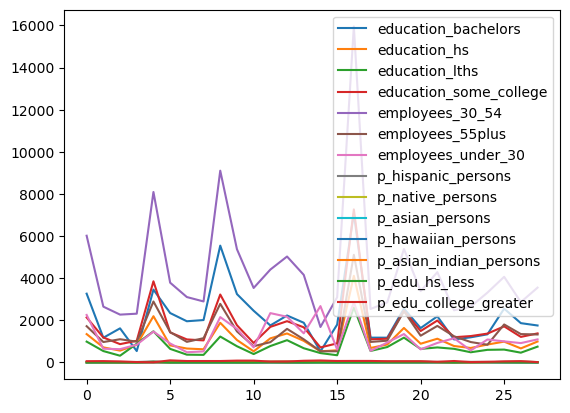

In [96]:
lodes_acs.plot()

In [97]:
import pandana as pdna
import geopandas as gpd
import os
if not os.path.exists('41740.h5'):
    import quilt3 as q3
    b = q3.Bucket("s3://spatial-ucr")
    b.fetch("osm/metro_networks_8k/41740.h5", "./41740.h5")
sd_network = pdna.Network.from_hdf5("41740.h5")

100%|██████████| 29.2M/29.2M [00:09<00:00, 3.18MB/s]


Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [98]:
from random import sample
from geosnap.analyze import isochrones_from_gdf

In [99]:
iso = isochrones_from_gdf(lodes,threshold=4000, network=sd_network) 

/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:140: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)


In [100]:
iso.explore()

In [101]:
lodes_to_plot=['education_bachelors','education_hs','education_lths','education_some_college']

In [102]:
acs_to_plot=['p_edu_hs_less','p_edu_college_greater']

In [103]:
ages_to_plot=['employees_30_54','employees_55plus',	'employees_under_30']

In [104]:
import geopandas as gpd

In [105]:

gdf = gpd.GeoDataFrame(lodes_acs, geometry='geometry', crs="EPSG:4326")

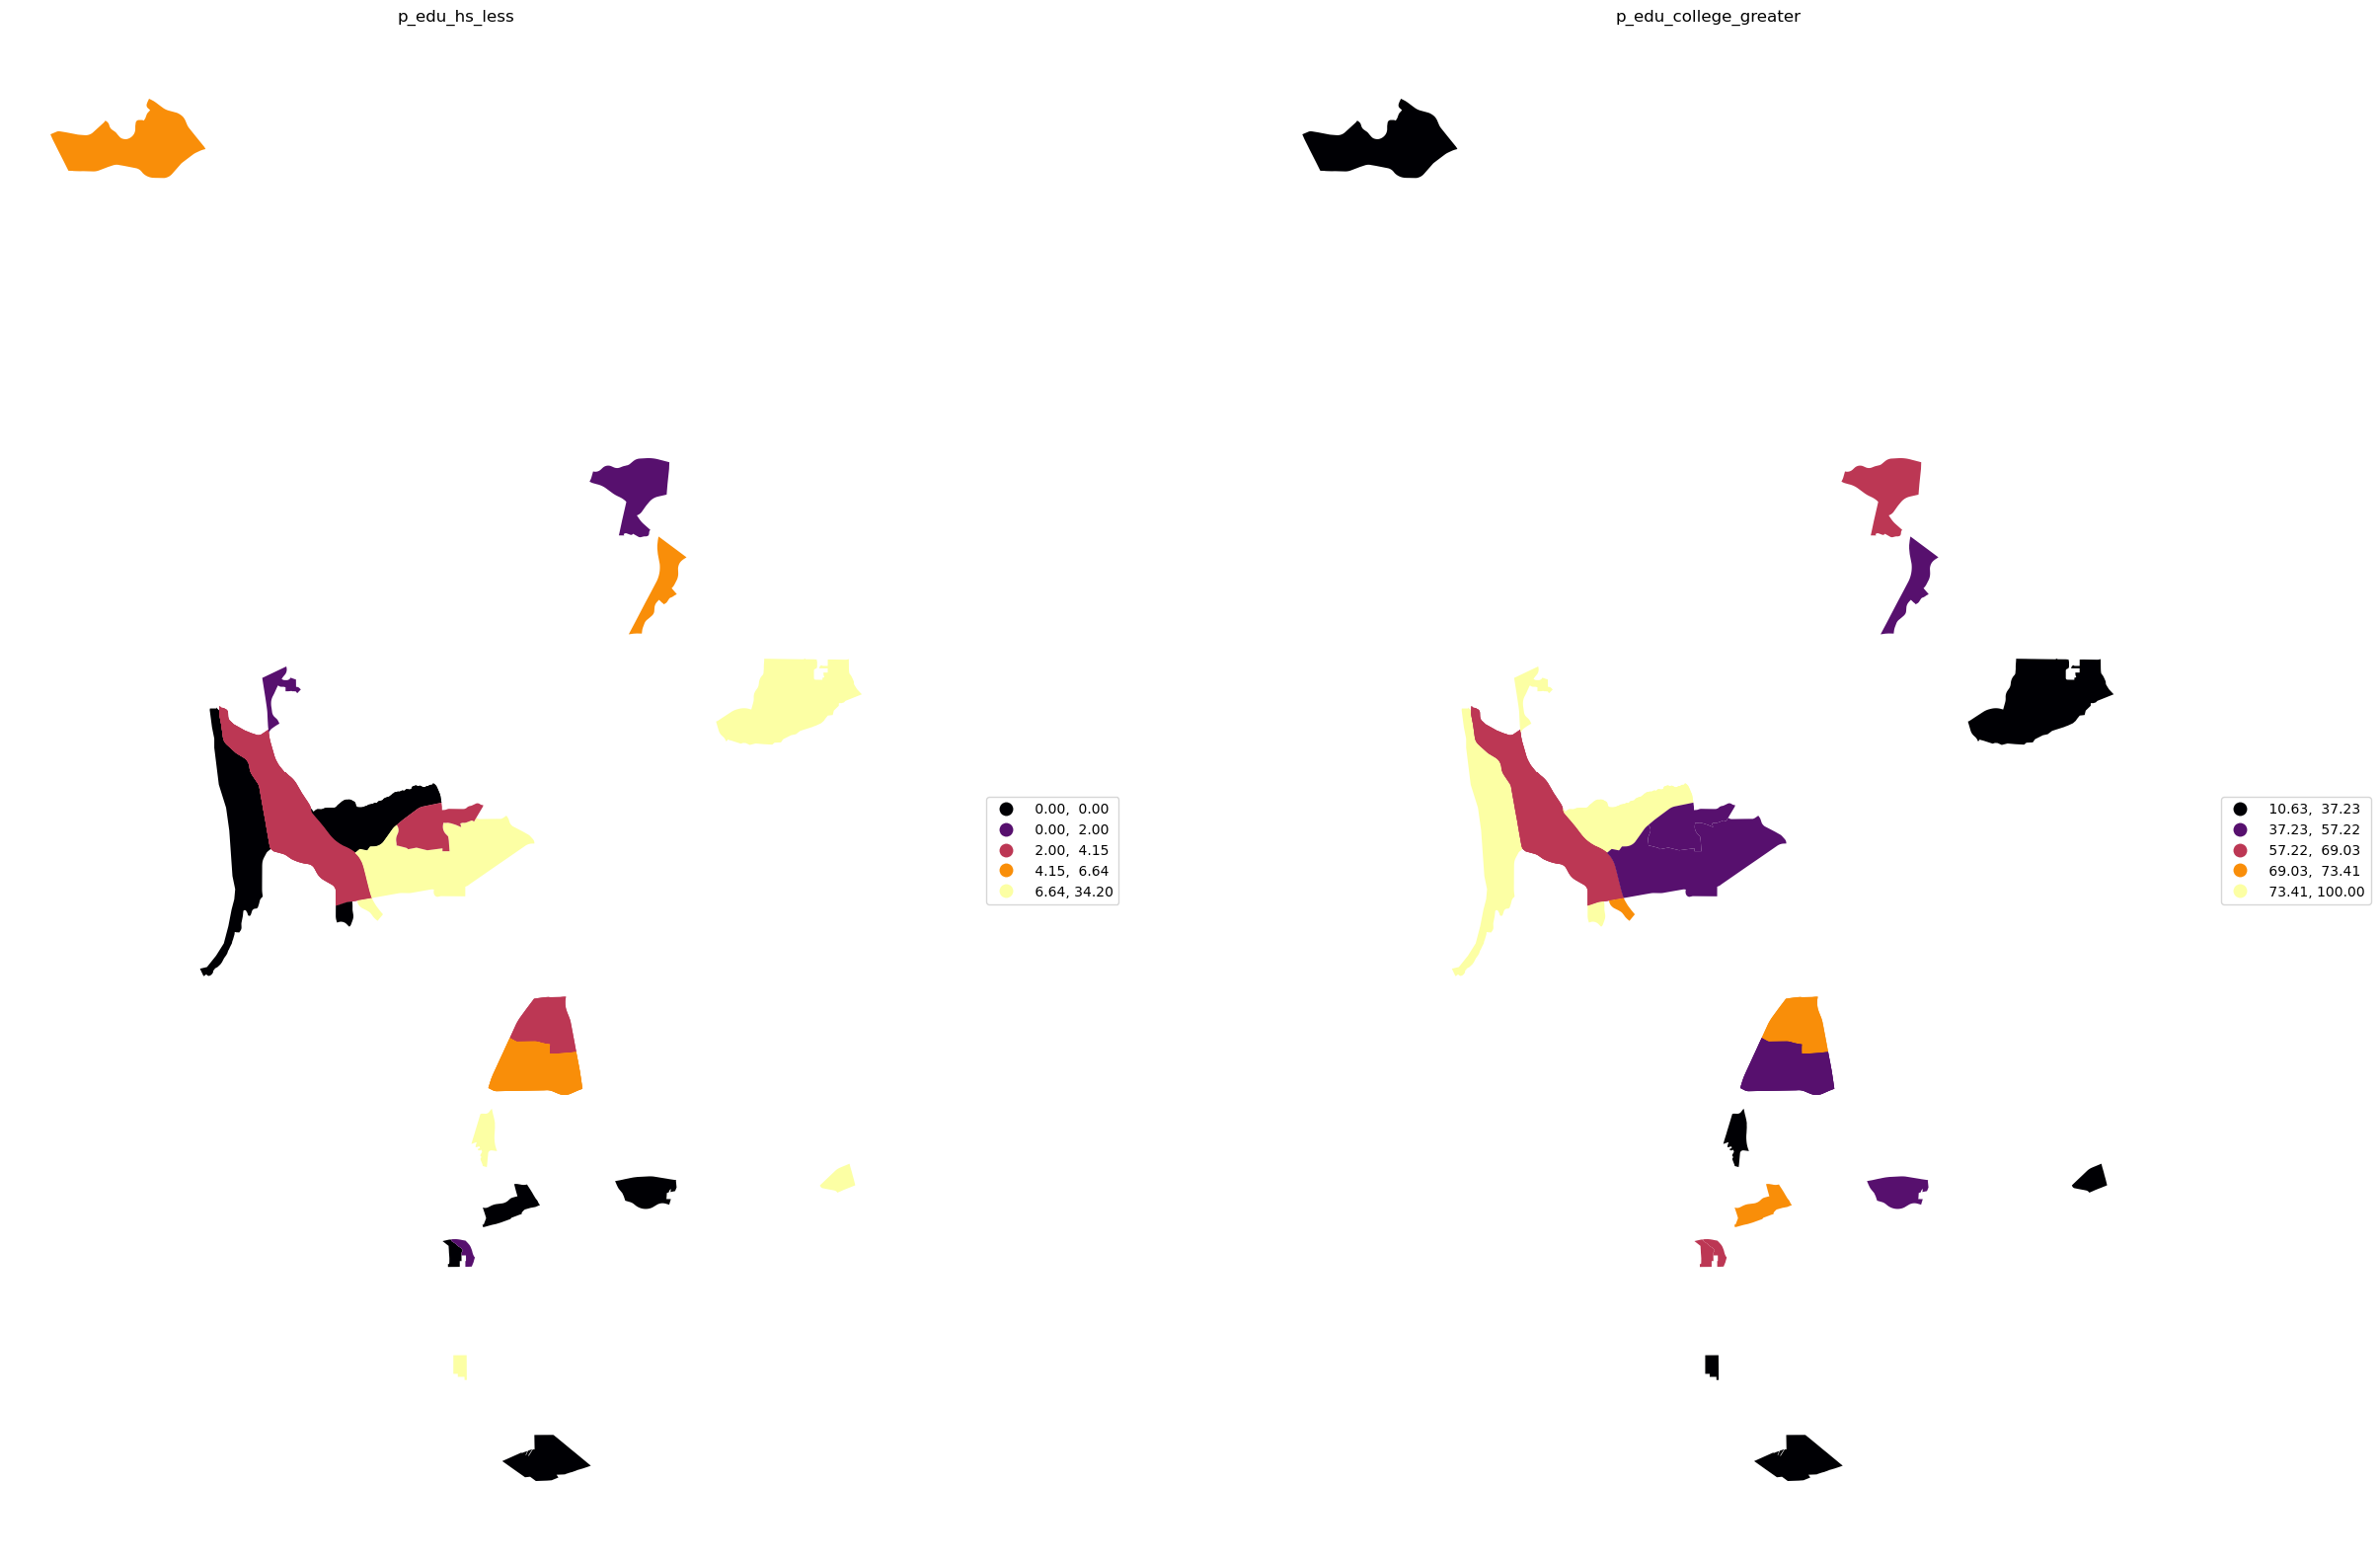

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(acs_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='inferno', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)

plt.show()

In [107]:
#people living closer to the coast have higher education levels than people living more inland 
#concentration of employment centers is closer to coast 
#lode = people working - lodes for people w college or greater is also higher closer to employment centers 


In [108]:
lodes2=demographics.merge(lodes_demos, left_on='geoid', right_on='shortgeoid')

In [109]:
lodes_demos

education_bachelors  education_hs  education_lths  \
214                 3266.0        1347.0           990.0   
229                 1174.0         717.0           542.0   
1604                1620.0         563.0           321.0   
3062                 542.0         840.0           891.0   
3859                3459.0        2196.0          1479.0   
4265                1152.0         975.0           638.0   
5937                7181.0        2678.0          1747.0   
5948                2425.0         270.0            92.0   
6079                2347.0         812.0           646.0   
6410                1957.0         662.0           371.0   
6423                2014.0         627.0           361.0   
6439                5547.0        1883.0          1231.0   
6519                3247.0        1067.0           771.0   
6543                2456.0         528.0           399.0   
6676                1758.0        1146.0           780.0   
6705                2230.0        1377.0          1059.0   
7096                1886.0        1026.0           676.0   
7218                 527.0         530.0           446.0   
7222                1798.0         579.0           343.0   
7690                7071.0        4113.0          2610.0   
7700                1179.0         688.0           548.0   
7768                1177.0         852.0           732.0   
7771                2558.0        1638.0          1179.0   
7775                1633.0         890.0           644.0   
7886                2190.0        1128.0           714.0   
8522                1094.0         781.0           648.0   
14242               1195.0         689.0           485.0   
16871               1337.0         852.0           600.0   
17007               2555.0         989.0           612.0   
17563               1867.0         668.0           465.0   
28563               1756.0         994.0           752.0   

       education_some_college  employees_30_54  employees_55plus  \
214                    2136.0           6017.0            1722.0   
229                    1187.0           2650.0             970.0   
1604                    871.0           2272.0            1103.0   
3062                   1031.0           2316.0             988.0   
3859                   3853.0           8092.0            2895.0   
4265                   1295.0           2719.0            1341.0   
5937                   4321.0          12173.0            3754.0   
5948                   1152.0           2794.0            1145.0   
6079                   1426.0           3788.0            1443.0   
6410                   1095.0           3106.0             979.0   
6423                   1048.0           2897.0            1153.0   
6439                   3226.0           9104.0            2783.0   
6519                   1768.0           5377.0            1476.0   
6543                    926.0           3537.0             772.0   
6676                   1690.0           4410.0             964.0   
6705                   1960.0           5030.0            1596.0   
7096                   1670.0           4159.0            1099.0   
7218                    714.0           1685.0             532.0   
7222                    907.0           3095.0             532.0   
7690                   7266.0          15950.0            5110.0   
7700                   1100.0           2540.0             975.0   
7768                   1128.0           2854.0            1035.0   
7771                   2447.0           5386.0            2436.0   
7775                   1493.0           3389.0            1271.0   
7886                   1992.0           4288.0            1736.0   
8522                   1198.0           2477.0            1244.0   
14242                  1254.0           2653.0             970.0   
16871                  1370.0           3317.0             842.0   
17007                  1714.0           4066.0            1804.0   
17563                  1214.0           2866.0

<Axes: >

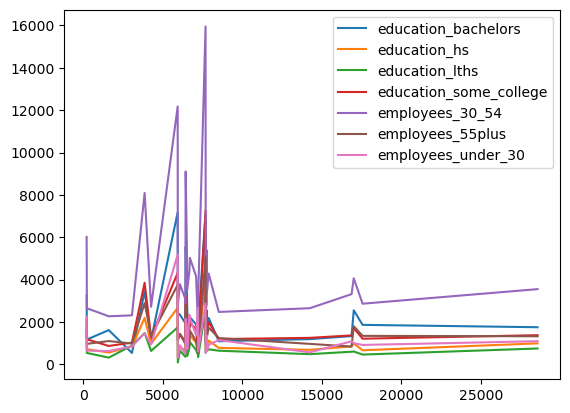

In [110]:
lodes_demos.plot()

<Axes: >

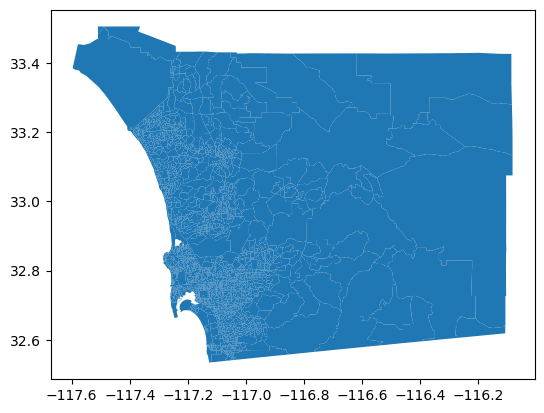

In [111]:
demographics.plot()

<Axes: >

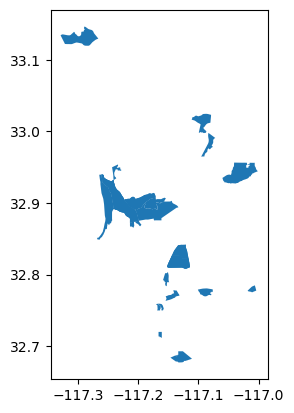

In [112]:
lodes2.plot()

In [113]:
combined = gpd.sjoin(lodes2,demographics, op='within')

/opt/tljh/user/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [114]:
combined.explore()

## The explore map above shows the demographic and age data for the employment ceters (combines lodes (employees,'right') and acs(residents, 'left')), hover on each isochrone to see the exact numbers for each category


In [115]:
gdf.explore()
# same data but in a geodataframe


In [116]:
lodes_to_plot

['education_bachelors',
 'education_hs',
 'education_lths',
 'education_some_college']

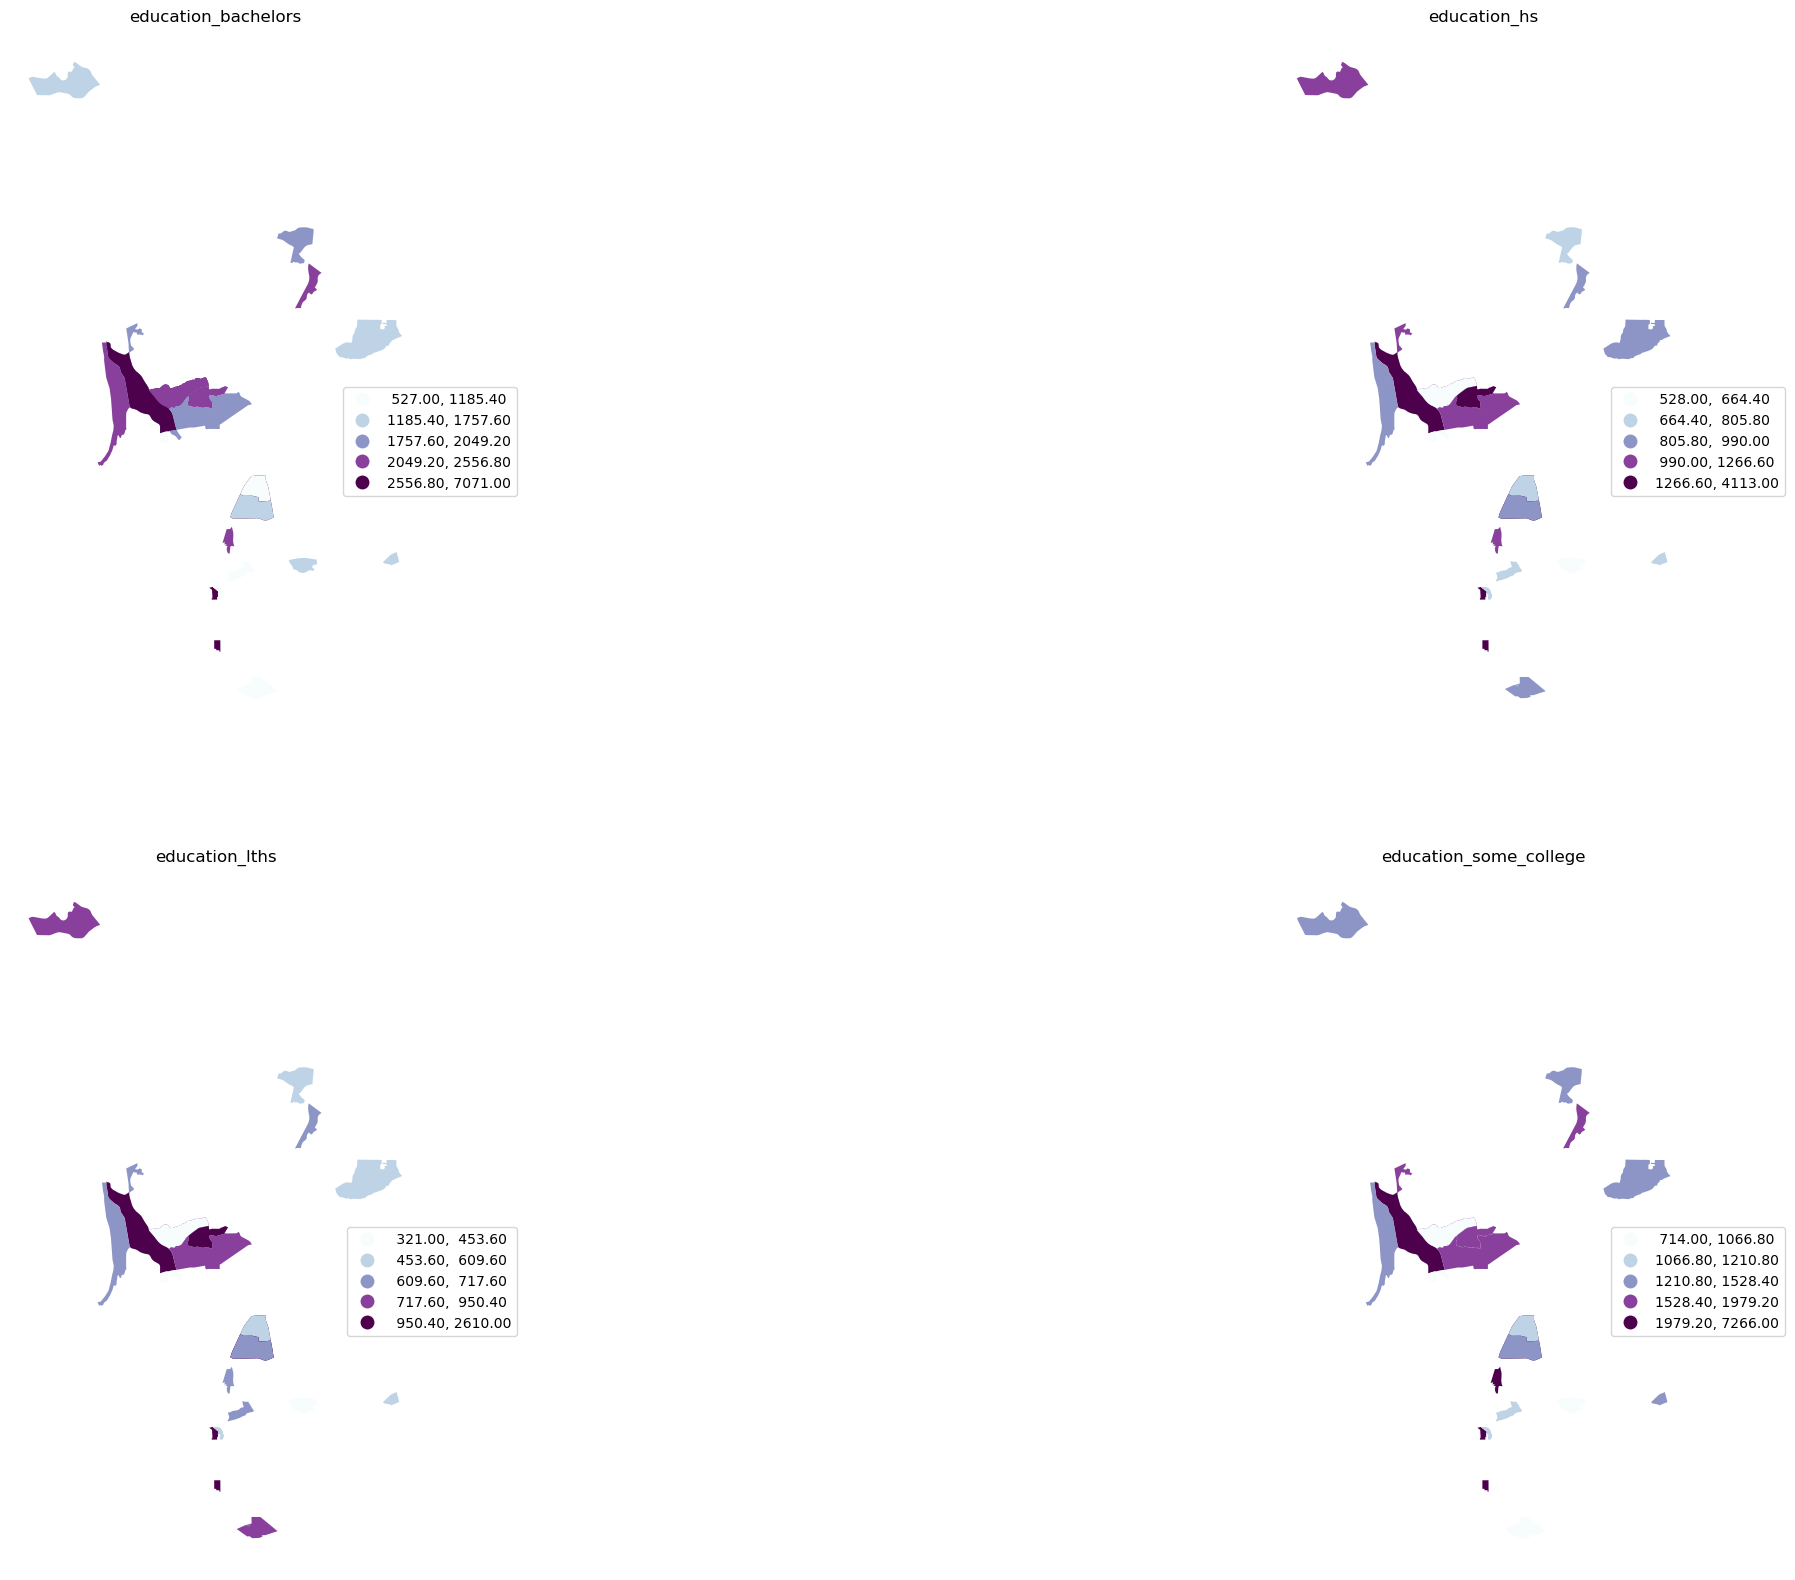

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(lodes_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='BuPu', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)

plt.show()

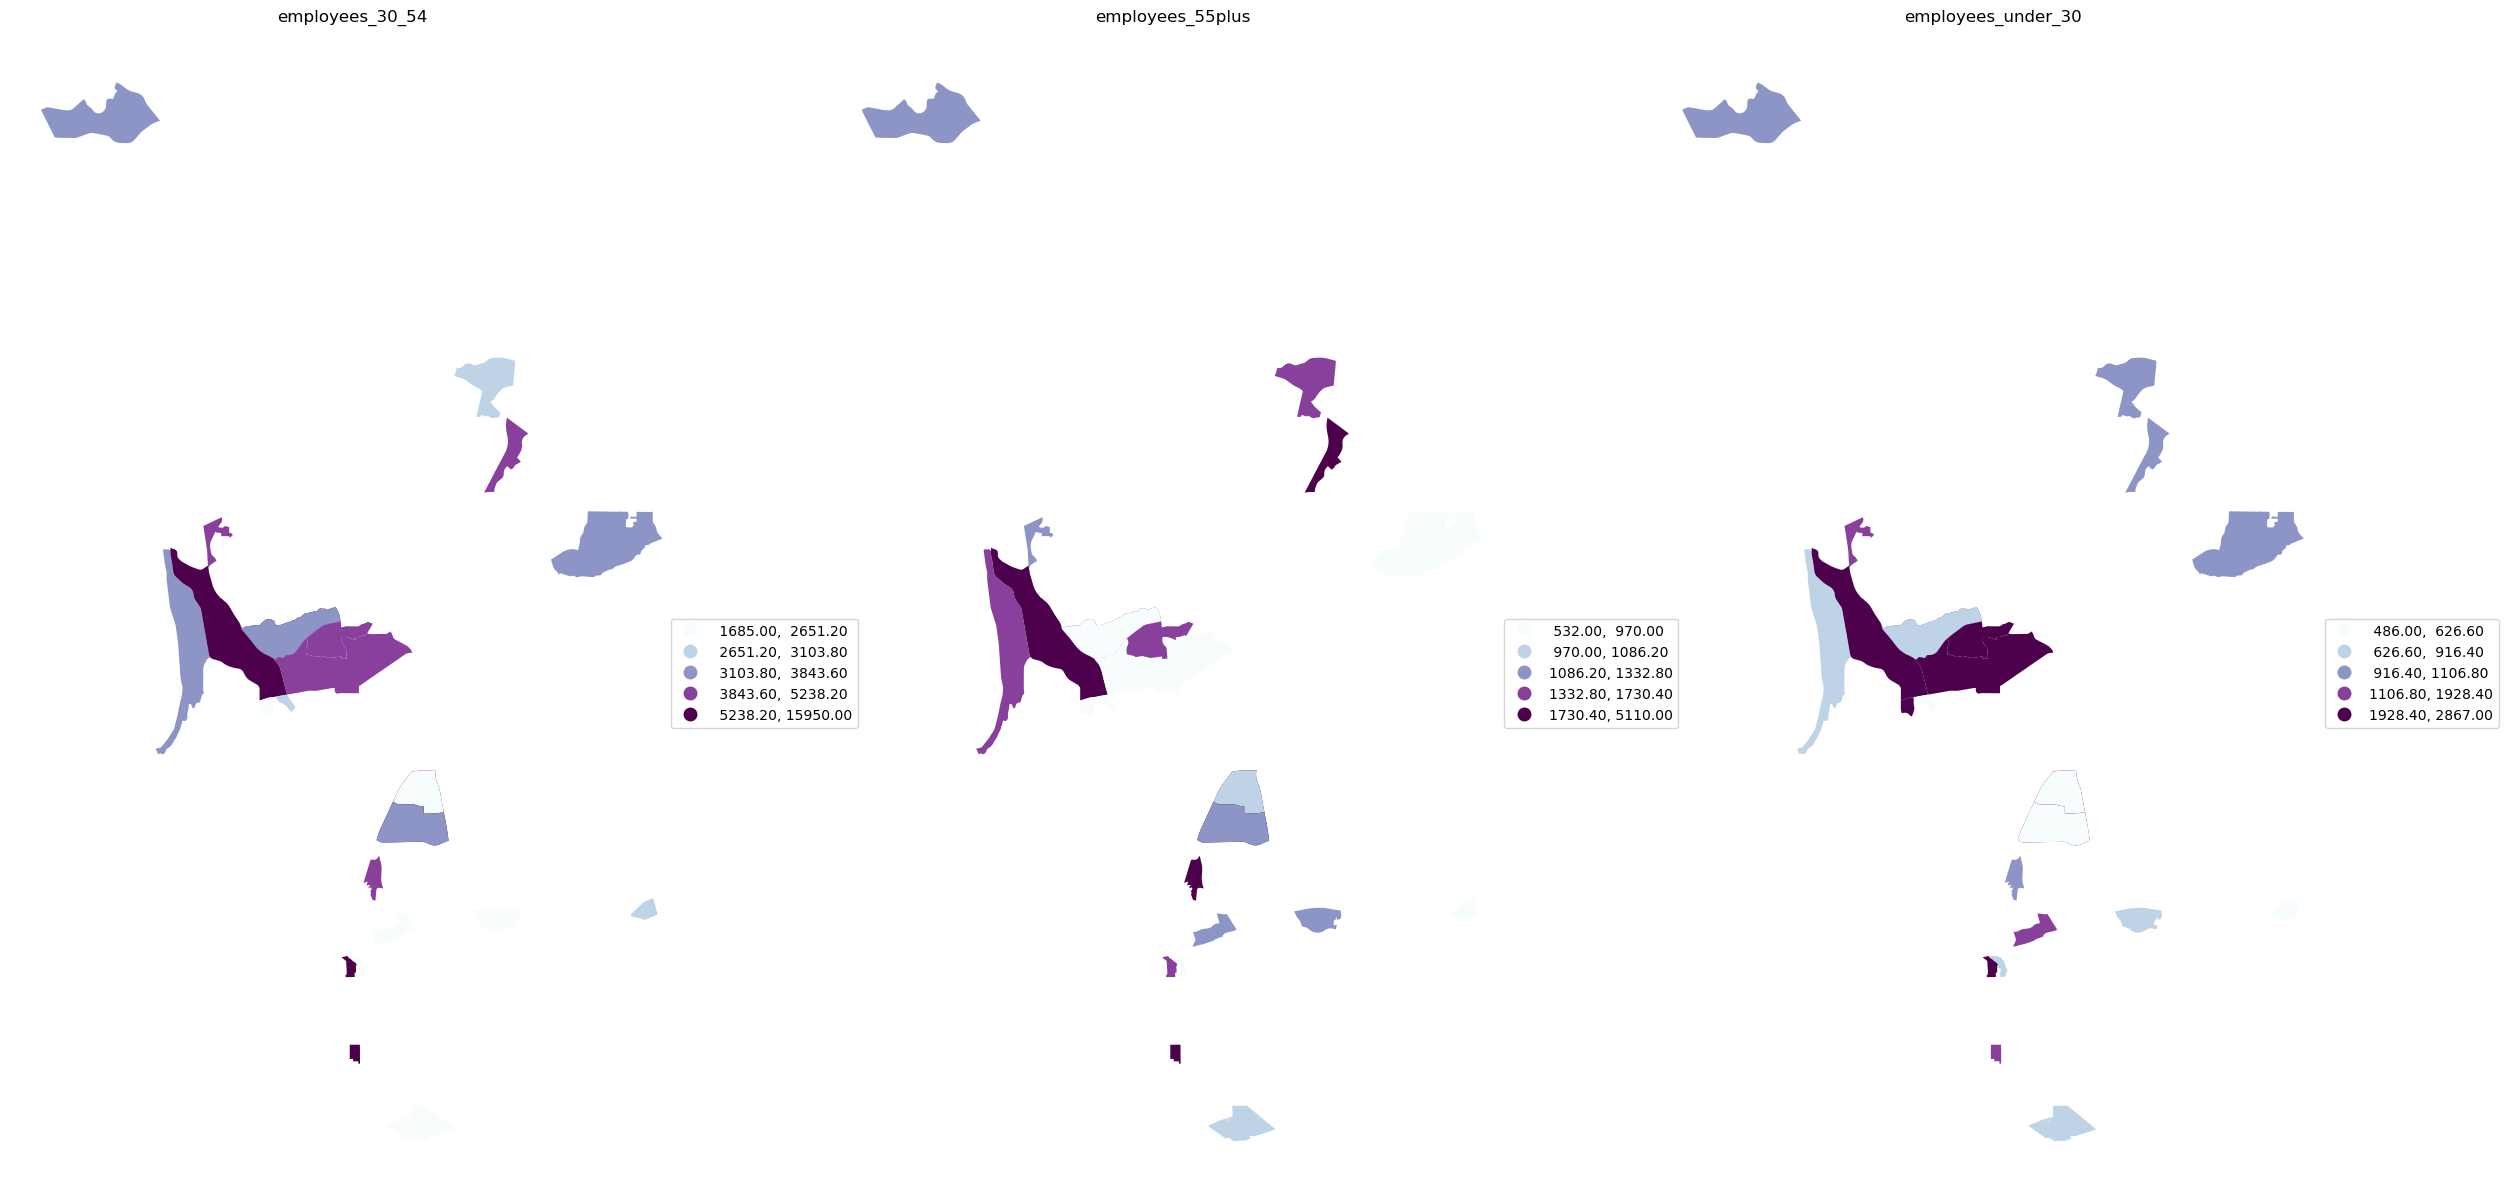

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(ages_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='BuPu', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)

plt.show()

<Axes: >

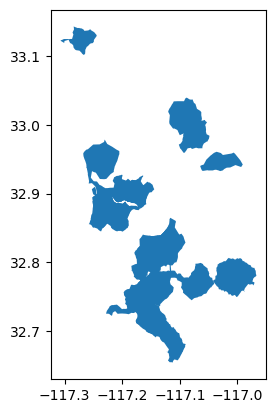

In [119]:
iso.plot()

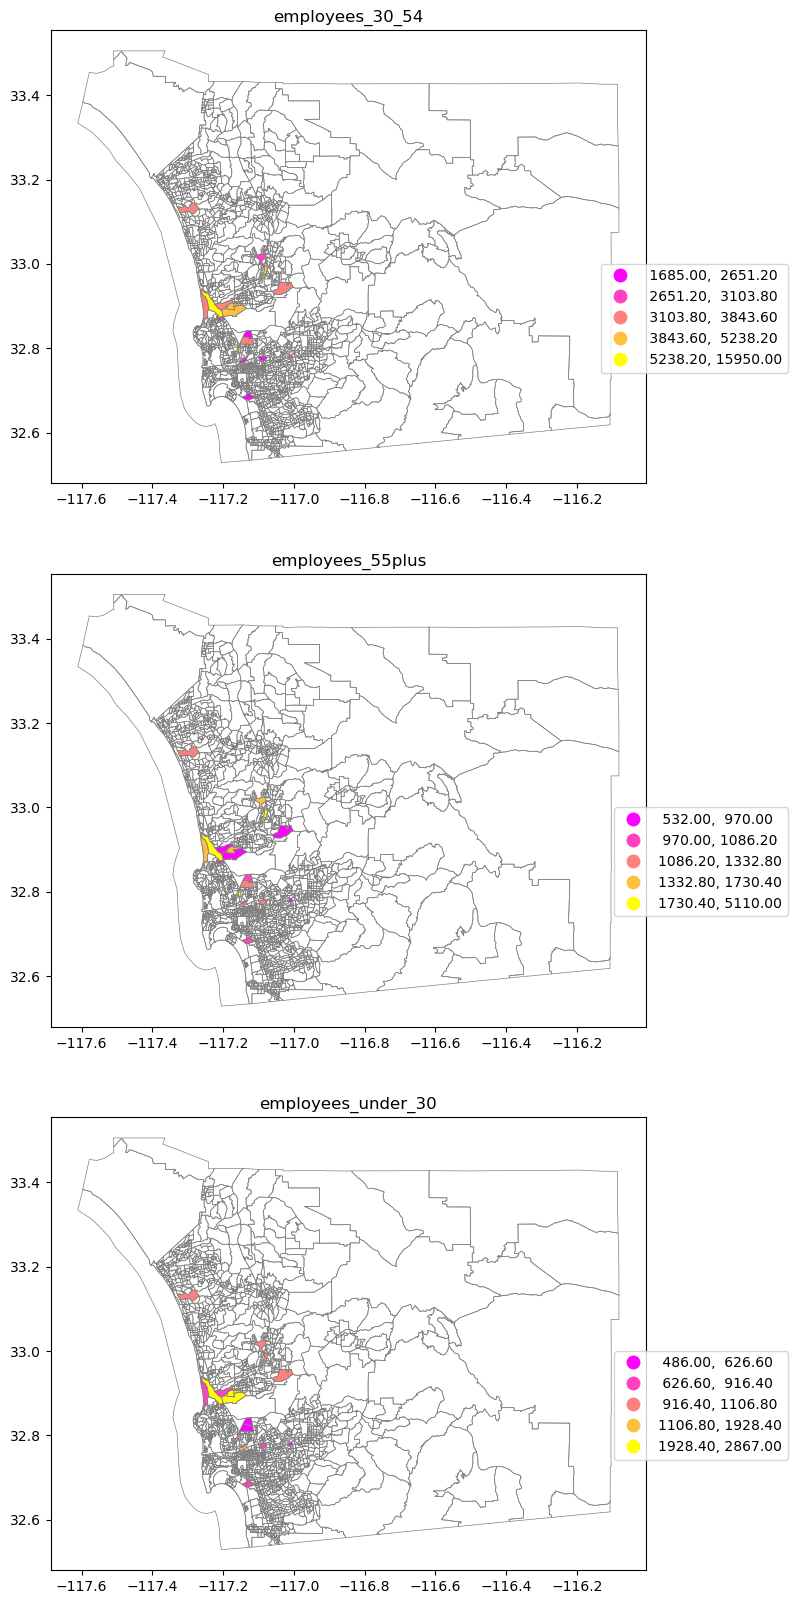

In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(ages_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='spring', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_title(col)
    sd_tracts.plot(ax=ax, color='none', edgecolor='gray',linewidth=0.5)  

plt.show()

### the various maps shown above refelct the demographics in lodes(employees) and census (residents) and this helps to compare who is close to employment centers 

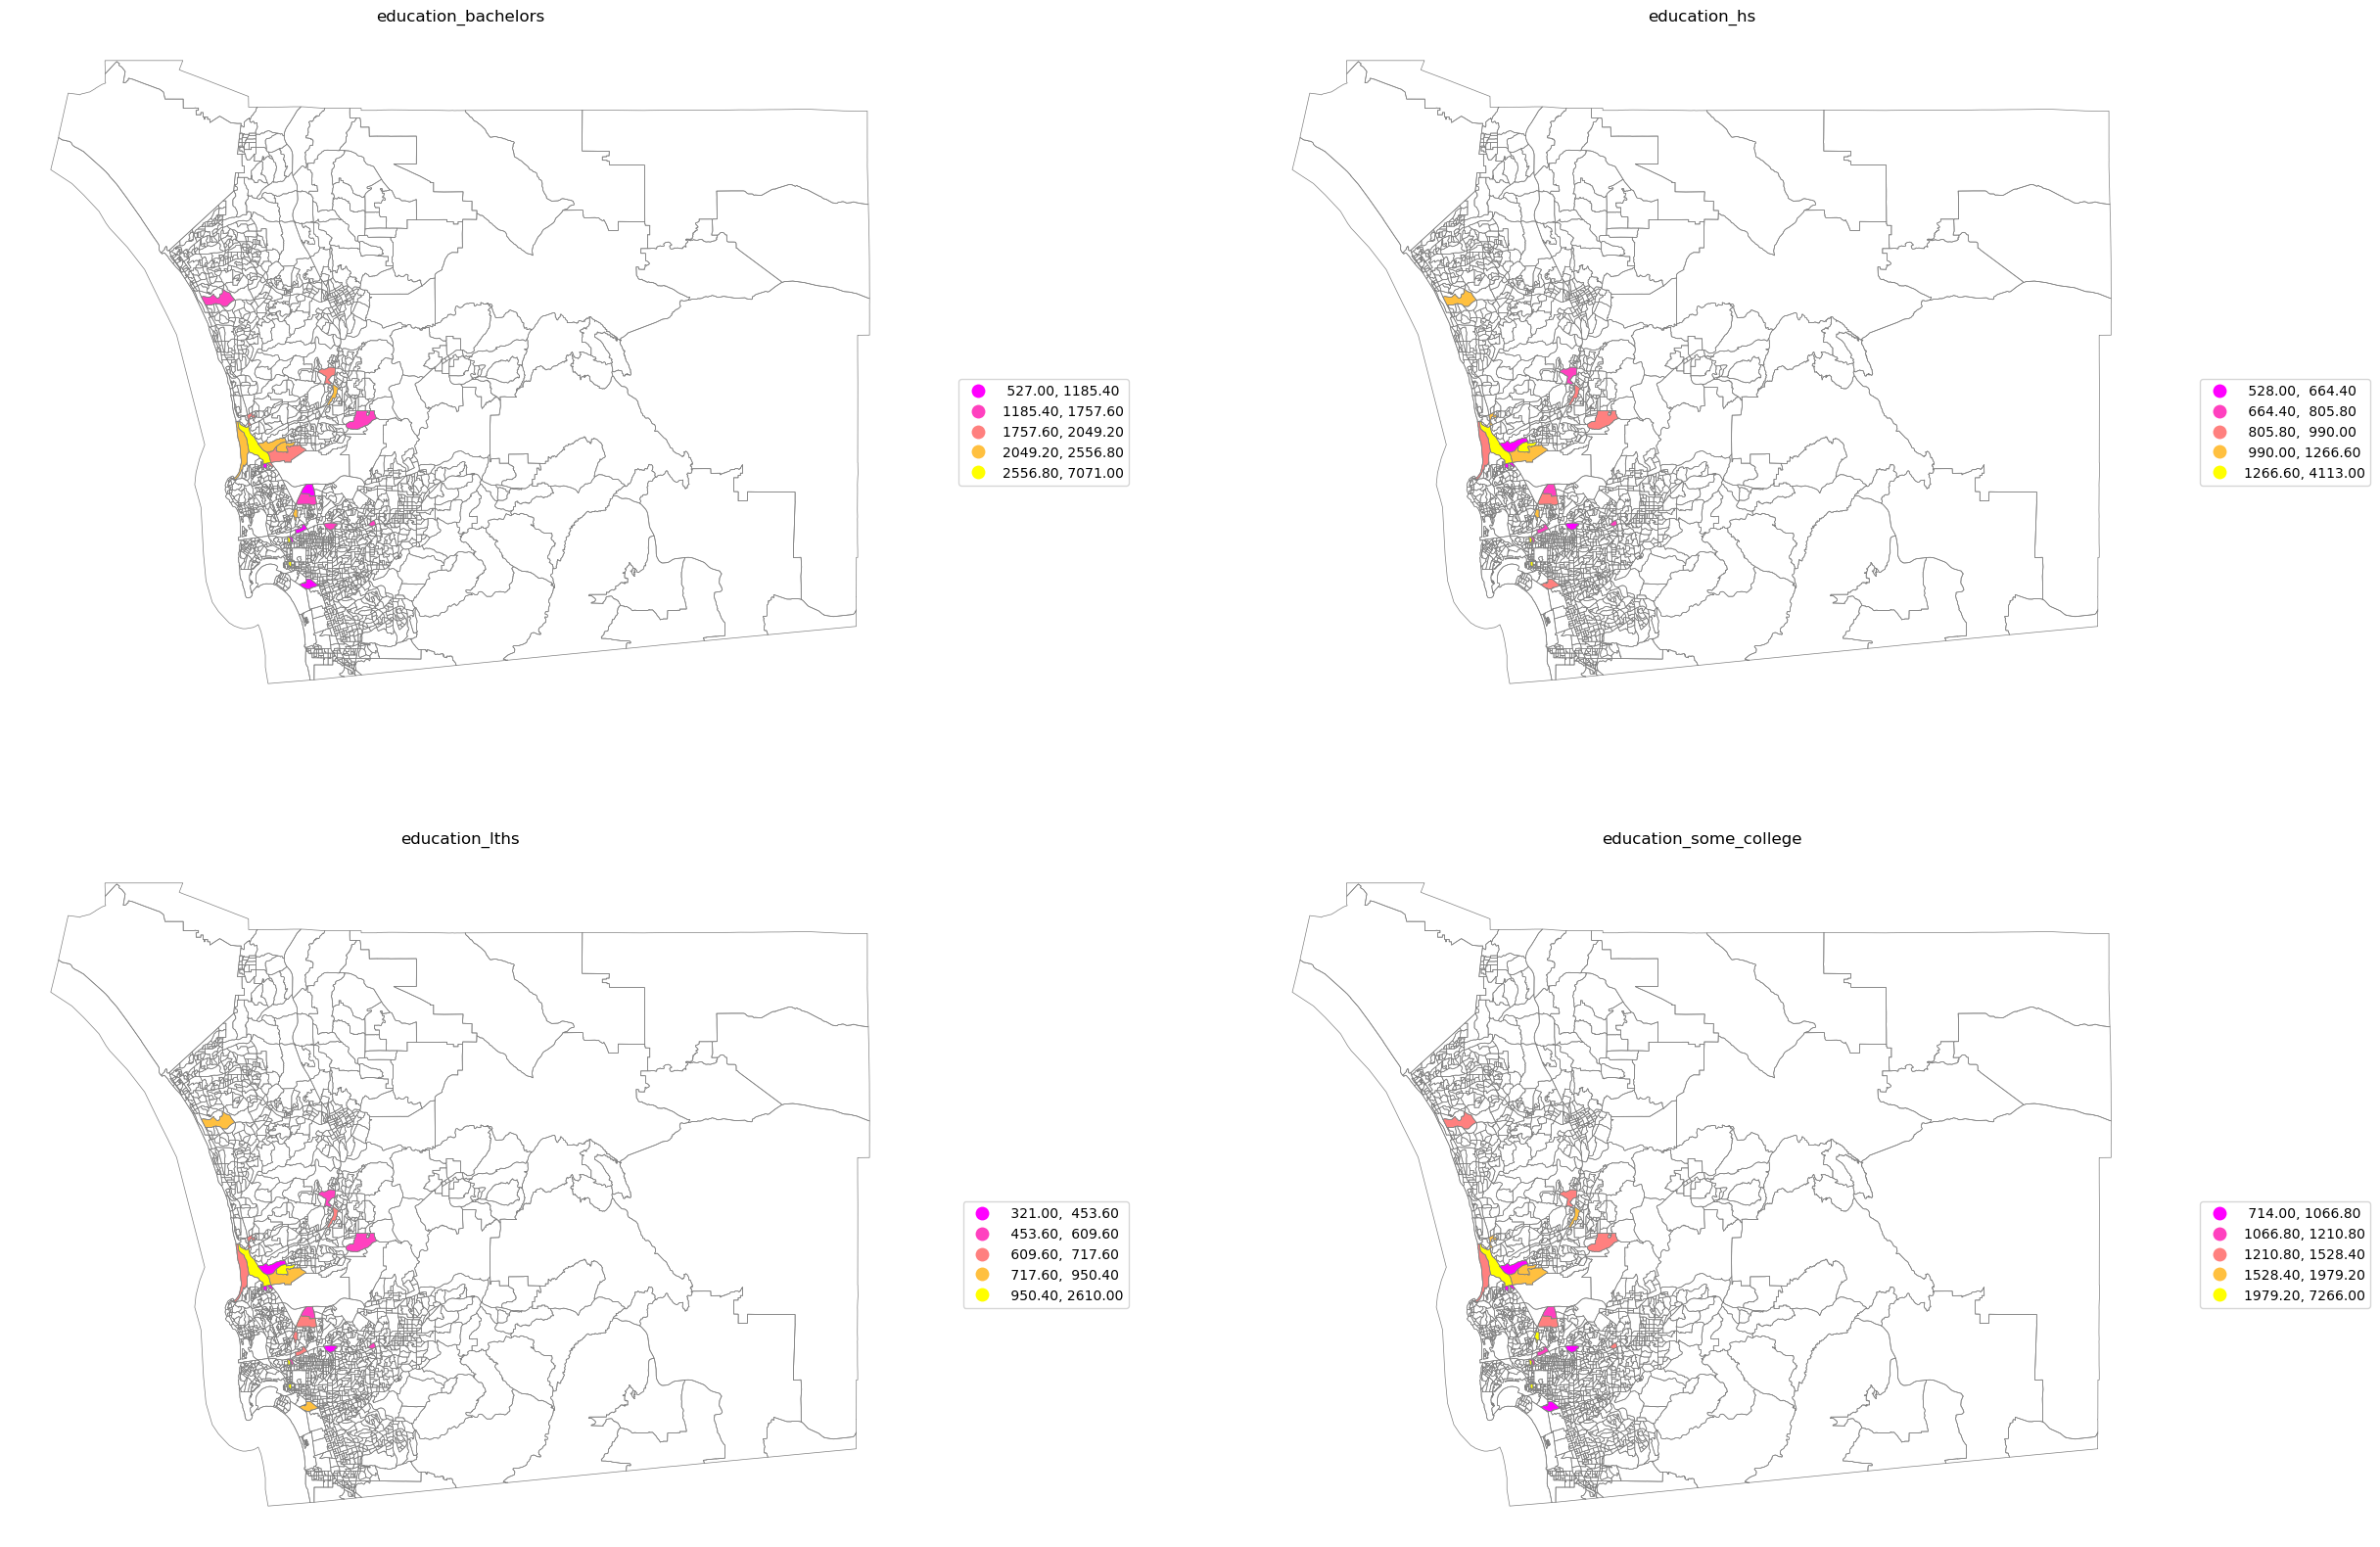

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(lodes_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='spring', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)
    sd_tracts.plot(ax=ax, color='none', edgecolor='gray',linewidth=0.5) 


plt.show()

## education of employees in the specified geographic areas 

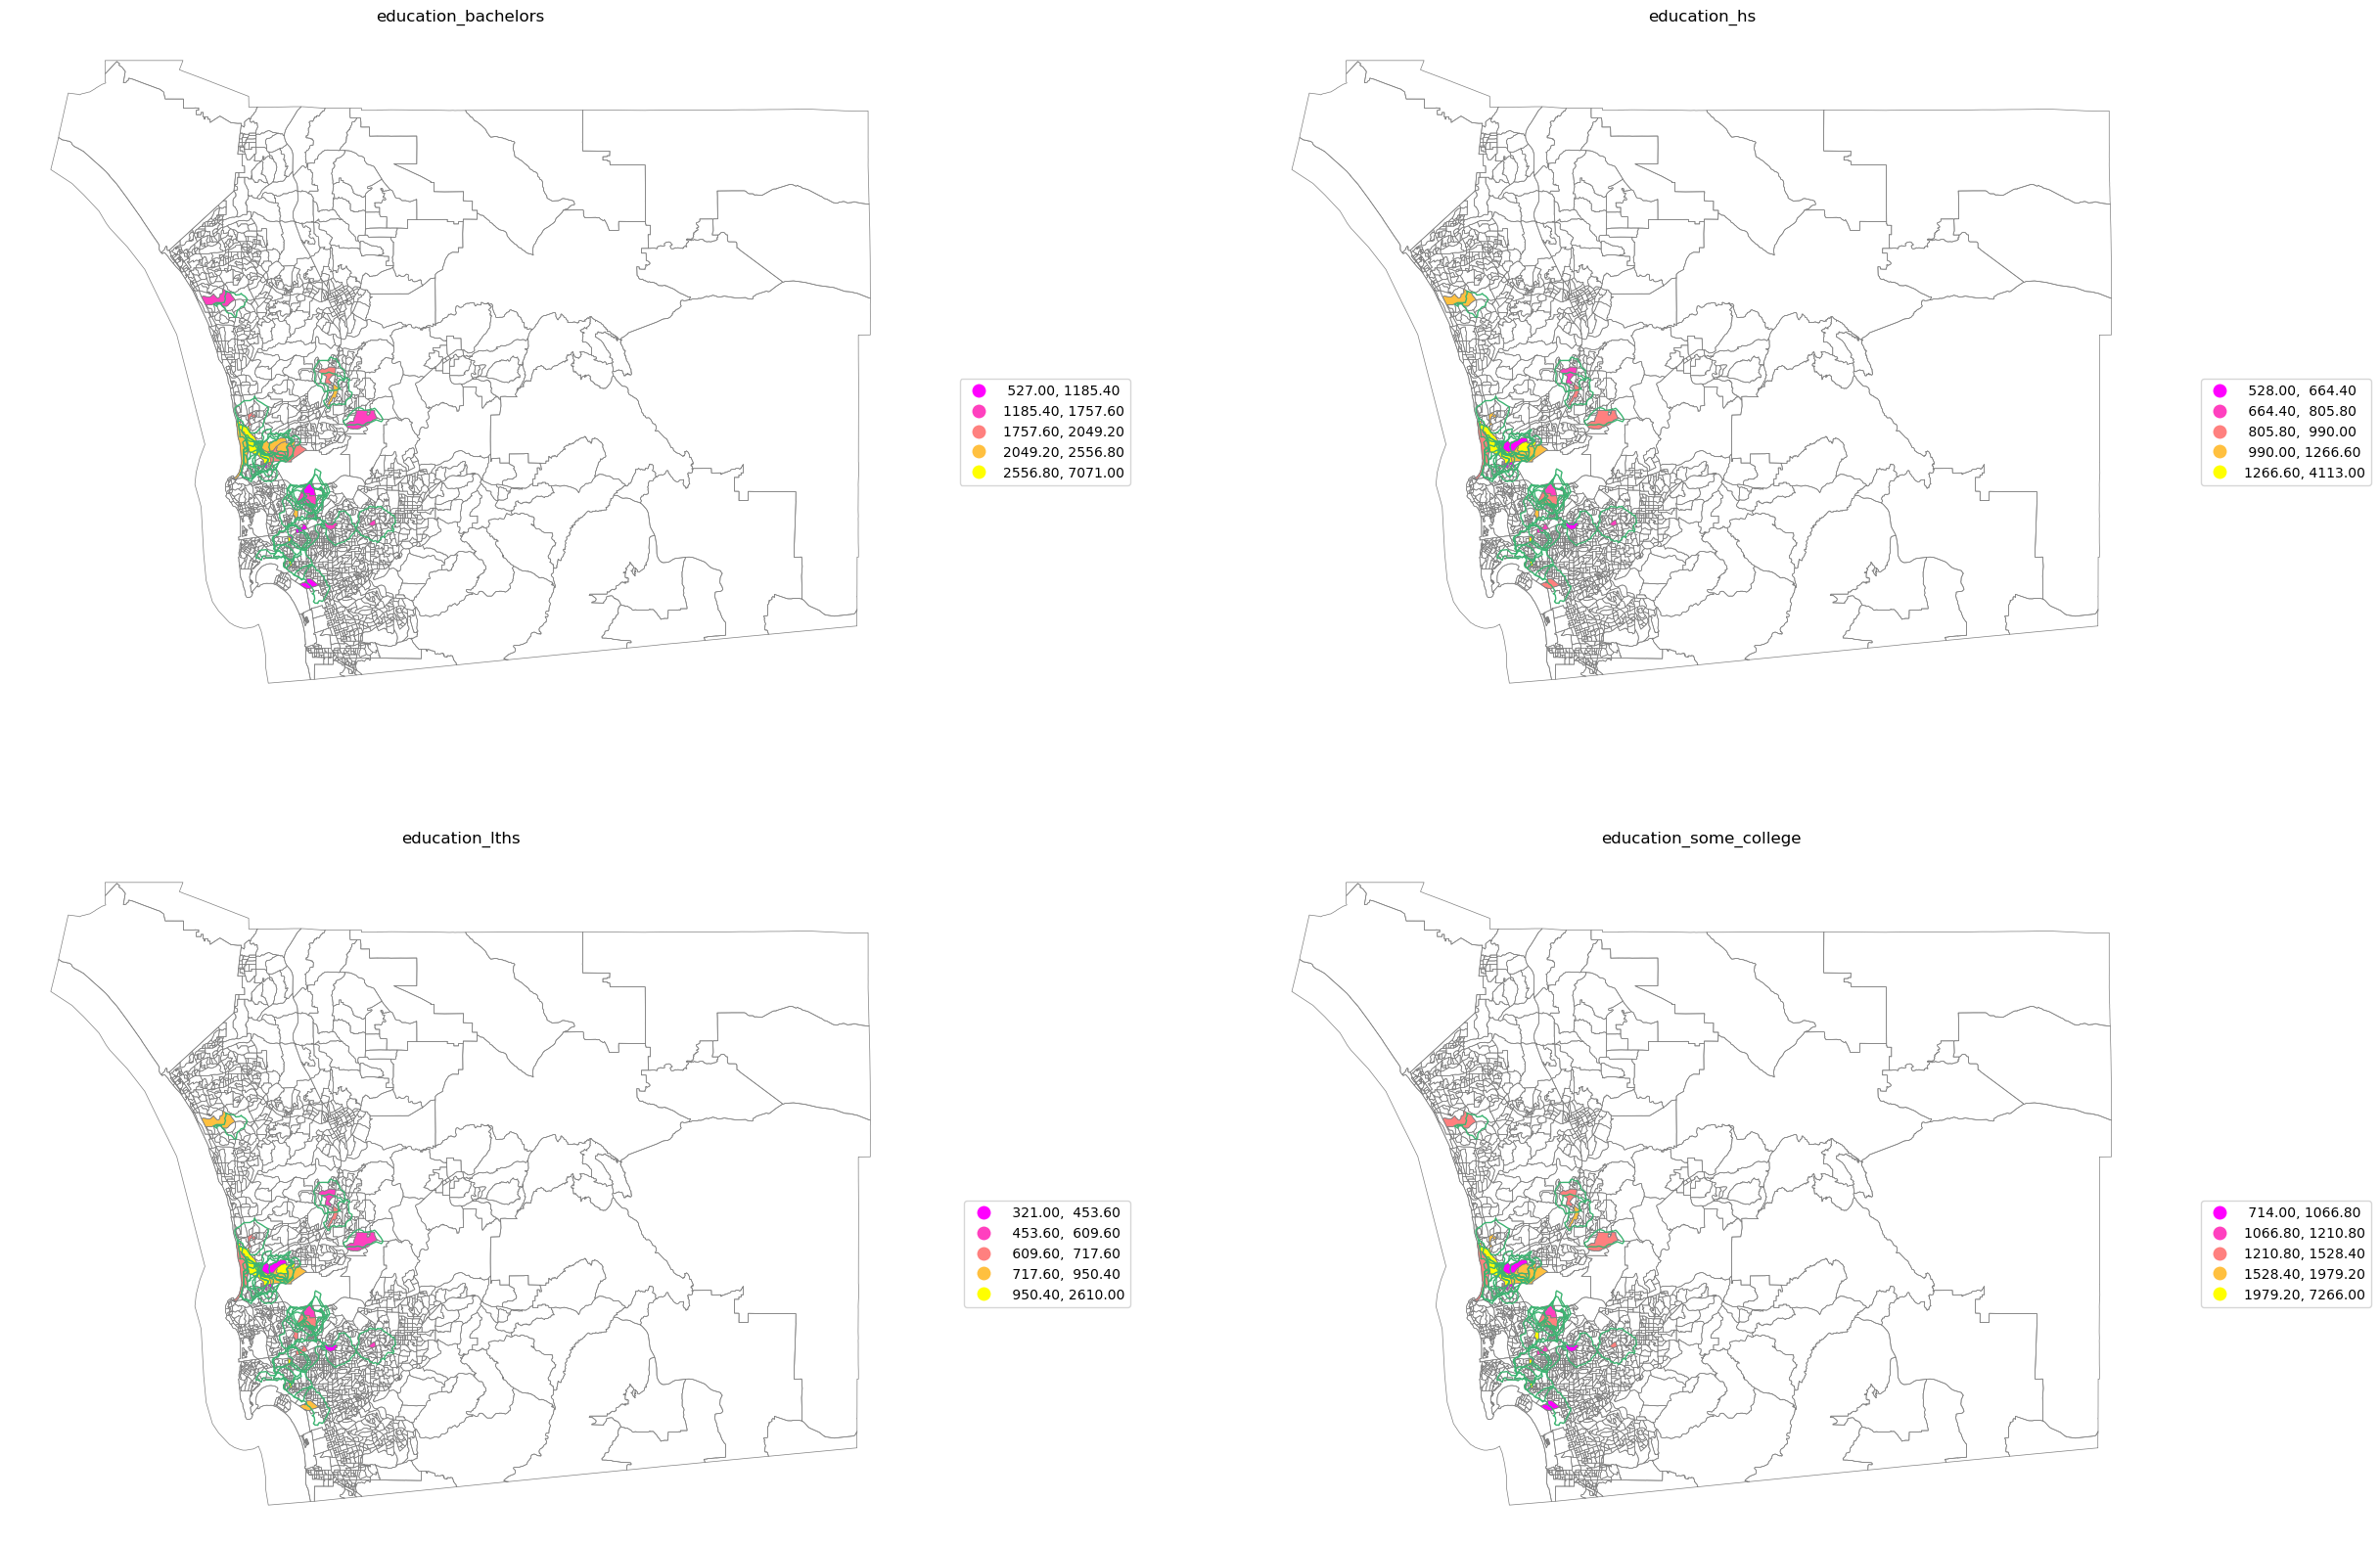

In [122]:
  fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(lodes_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='spring', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)
    sd_tracts.plot(ax=ax, color='none', edgecolor='gray',linewidth=0.5) 
    iso.plot(ax=ax,color='none', edgecolor='mediumseagreen')


plt.show() 

## education of employees in specified geographic areas combined withh employment centers 

In [123]:
## employment centers in general seem to have higher education levels for the employees and more specifically, employment centers along the coast while closer to inland employment centers have lower education for employees and also for residents (see below maps)

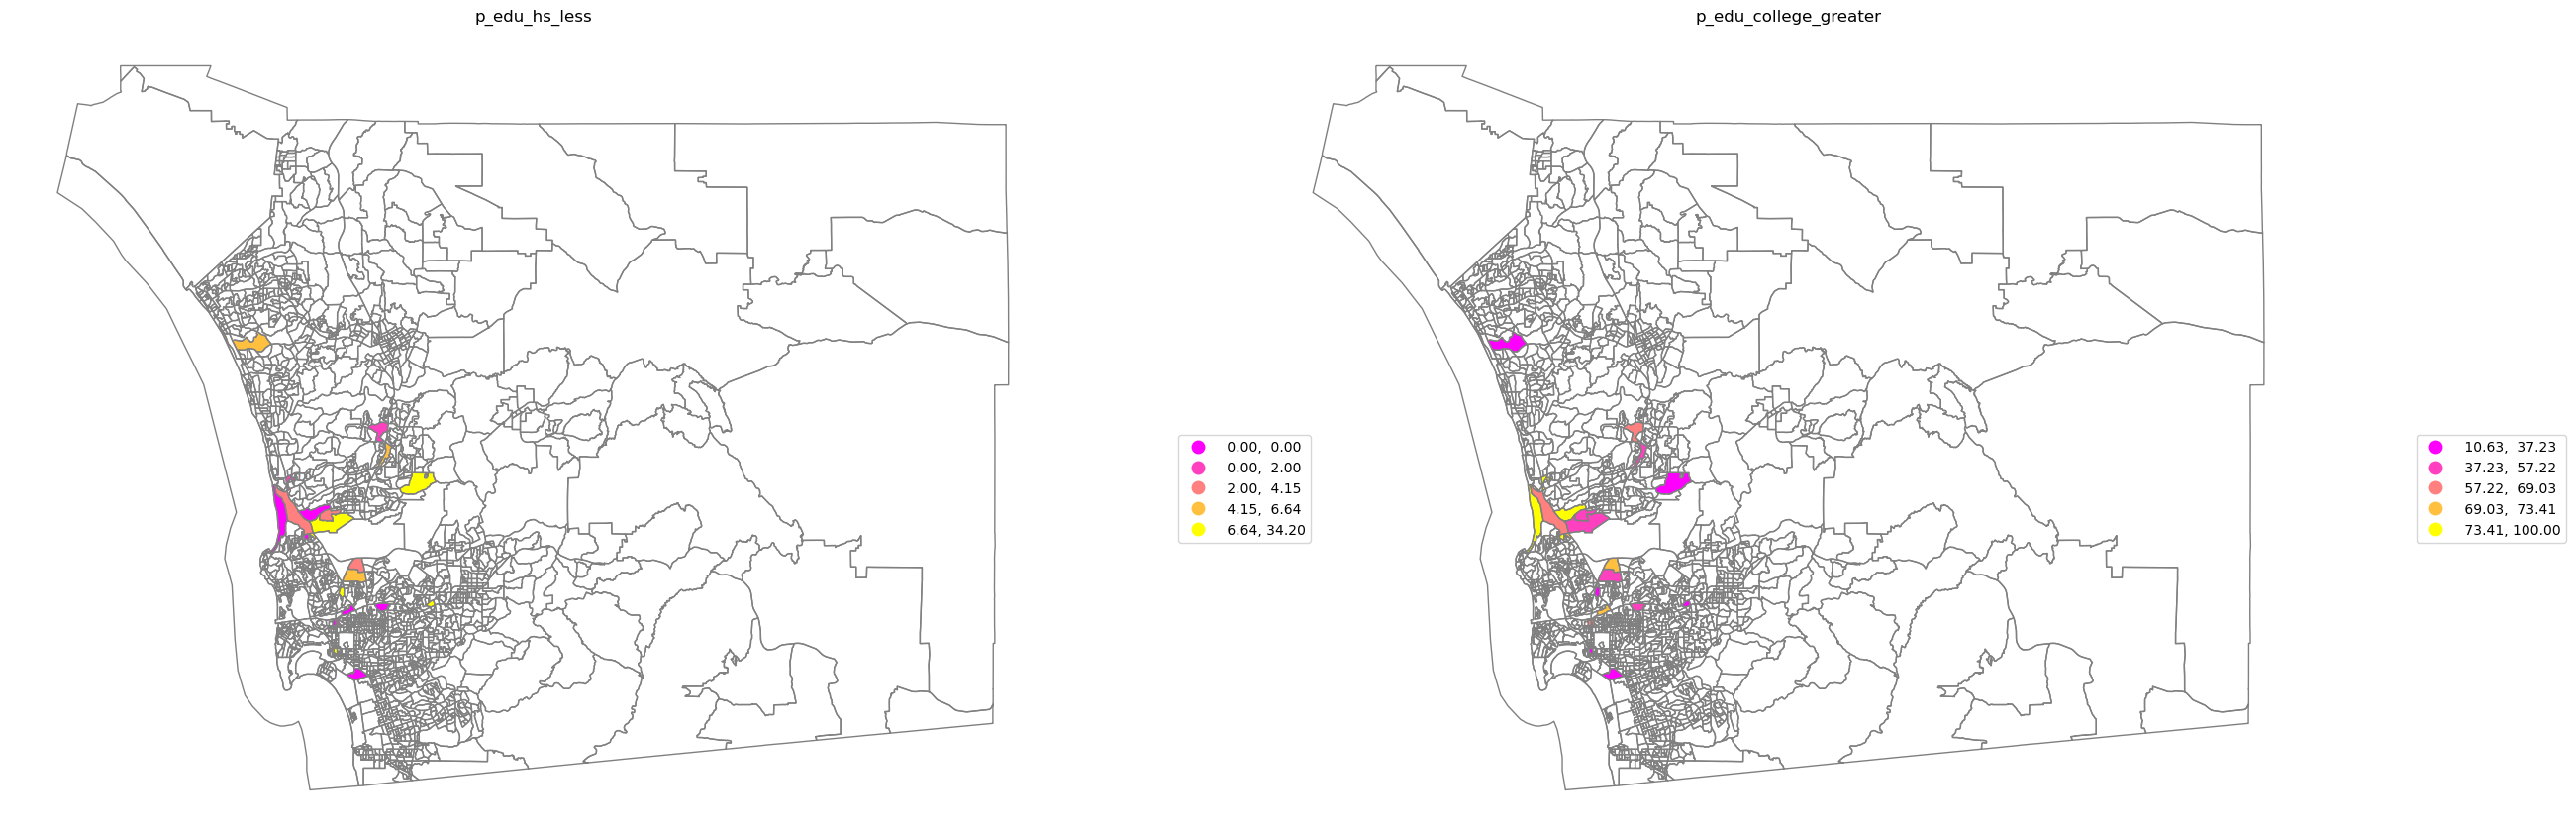

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(acs_to_plot):
    ax = axs[i]
    gdf.plot(column=col, ax=ax, scheme="Quantiles", cmap='spring', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)
    sd_tracts.plot(ax=ax, color='none', edgecolor='gray') 

plt.show()

##education levels of residents of geographic areas 